# Medical Image Processing a

## [Arya Koureshi](https://github.com/AryaKoureshi)

### arya.koureshi@gmail.com

---

## Theory section

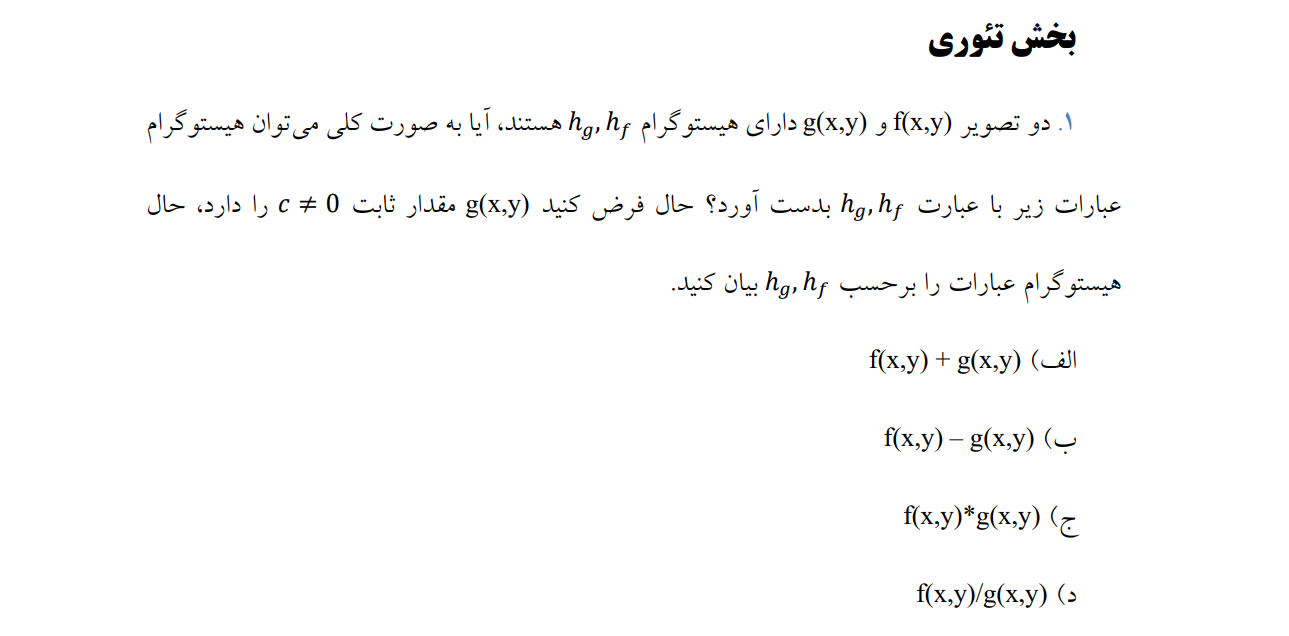

When you perform operations on images, the resulting histogram generally changes. However, for simple operations, we can express the histogram of the resulting image in terms of the histograms of the original images. 

Let's denote the histogram of the resulting image as h_r.

1) **f(x,y) + g(x,y)**:
   The histogram of the sum of two images is the convolution of their histograms. Therefore, the histogram of the resulting image can be expressed as:
   
   $$
    h_r = h_f * h_g
   $$

3) **f(x,y) - g(x,y)**:
   Similarly, the histogram of the difference of two images can be expressed as:
   $$ h_r = h_f * h_g' $$
   Where $$ h_g' $$ is the mirrored histogram of g(x,y) (i.e., $$ h_g' = \text{reverse}(h_g) $$)

4) **f(x,y) * g(x,y)**:
   The histogram of the product of two images is not simply related to the histograms of the original images.

5) **f(x,y) / g(x,y)**:
   The histogram of the division of two images also does not have a simple relationship with the histograms of the original images.

Now, if g(x,y) has a non-zero constant value, say k, then its histogram will be a spike at k.

1) **f(x,y) + k**:
   The histogram of the sum would be the same as the histogram of f(x,y) since adding a constant doesn't change the shape of the histogram.

2) **f(x,y) - k**:
   Similarly, the histogram of the difference would be the same as the histogram of f(x,y).

3) **f(x,y) * k**:
   Multiplying by a constant would scale the histogram of f(x,y) by k.

4) **f(x,y) / k**:
   Dividing by a constant would scale the histogram of f(x,y) by 1/k.

So, with g(x,y) being a constant value k, the histograms of the resulting images in cases 1 and 2 would remain the same as the histogram of f(x,y). For cases 3 and 4, they would be scaled versions of the histogram of f(x,y).

---

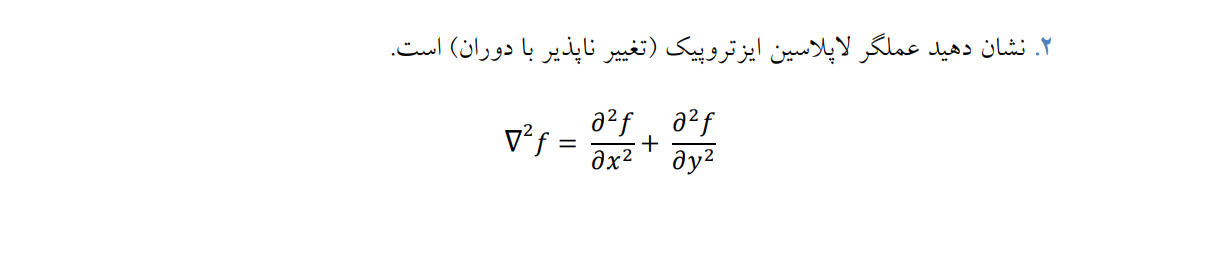

To prove that the Laplacian operator is isotropic, we need to show that it behaves identically in all directions. Let's consider the Laplacian operator in Cartesian coordinates:

$$ \nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} $$

Now, let's introduce a change of coordinates. We'll consider a rotation of the coordinate system by an angle $$ \theta $$ counterclockwise. The new coordinates $$ (x', y') $$ are related to the original coordinates $$ (x, y) $$ by:

$$ \begin{cases} x' = x \cos \theta - y \sin \theta \\ y' = x \sin \theta + y \cos \theta \end{cases} $$

To express the Laplacian in terms of the new coordinates $$ (x', y') $$, we need to find the expressions for $$ \frac{\partial}{\partial x} $$ and $$ \frac{\partial}{\partial y} $$ in terms of $$ \frac{\partial}{\partial x'} $$ and $$ \frac{\partial}{\partial y'} $$ using the chain rule.

Differentiating $$ x' $$ and $$ y' $$ with respect to $$ x $$ and $$ y $$, respectively, we get:

$$ \frac{\partial x'}{\partial x} = \cos \theta $$
$$ \frac{\partial y'}{\partial x} = -\sin \theta $$
$$ \frac{\partial x'}{\partial y} = \sin \theta $$
$$ \frac{\partial y'}{\partial y} = \cos \theta $$

Using the chain rule, we can express $$ \frac{\partial}{\partial x} $$ and $$ \frac{\partial}{\partial y} $$ in terms of $$ \frac{\partial}{\partial x'} $$ and $$ \frac{\partial}{\partial y'} $$:

$$ \frac{\partial}{\partial x} = \frac{\partial x'}{\partial x} \frac{\partial}{\partial x'} + \frac{\partial y'}{\partial x} \frac{\partial}{\partial y'} = \cos \theta \frac{\partial}{\partial x'} - \sin \theta \frac{\partial}{\partial y'} $$
$$ \frac{\partial}{\partial y} = \frac{\partial x'}{\partial y} \frac{\partial}{\partial x'} + \frac{\partial y'}{\partial y} \frac{\partial}{\partial y'} = \sin \theta \frac{\partial}{\partial x'} + \cos \theta \frac{\partial}{\partial y'} $$

Now, let's compute the second derivatives with respect to $$ x' $$ and $$ y' $$:

$$ \frac{\partial^2 f}{\partial x'^2} = \frac{\partial}{\partial x'} \left( \frac{\partial f}{\partial x'} \right) = \frac{\partial}{\partial x'} \left( \cos \theta \frac{\partial f}{\partial x} - \sin \theta \frac{\partial f}{\partial y} \right) $$
$$ = \cos \theta \frac{\partial^2 f}{\partial x^2} - \sin \theta \frac{\partial^2 f}{\partial x \partial y} $$

Similarly,

$$ \frac{\partial^2 f}{\partial y'^2} = \sin \theta \frac{\partial^2 f}{\partial x \partial y} + \cos \theta \frac{\partial^2 f}{\partial y^2} $$

Now, summing these two expressions:

$$ \frac{\partial^2 f}{\partial x'^2} + \frac{\partial^2 f}{\partial y'^2} = \cos \theta \frac{\partial^2 f}{\partial x^2} + \sin \theta \frac{\partial^2 f}{\partial x \partial y} + \sin \theta \frac{\partial^2 f}{\partial x \partial y} + \cos \theta \frac{\partial^2 f}{\partial y^2} $$
$$ = \cos \theta \left( \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} \right) + 2 \sin \theta \frac{\partial^2 f}{\partial x \partial y} $$

This expression is not equal to $$ \nabla^2 f $$ unless $$ \sin \theta = 0 $$ (i.e., $$ \theta = 0^\circ $$ or $$ \theta = 180^\circ $$), making the rotation trivial, or $$ \frac{\partial^2 f}{\partial x \partial y} = 0 $$, which implies that the mixed partial derivatives vanish. In other words, for the Laplacian to be isotropic under rotation, the function $$ f(x, y) $$ must have continuous second partial derivatives and its cross-derivatives must vanish.

Therefore, the Laplacian operator is isotropic when the conditions mentioned above are satisfied.

---

## Coding section
### Question 1
#### part 1

In [1]:
#%% part 1
#%% Imports
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from PIL import Image
from scipy.ndimage import median_filter, gaussian_filter, uniform_filter
from skimage.metrics import structural_similarity as ssim

In [2]:
#%% 1.1
nii_file_path = 'C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/sub-0001_space-MNI_T1w/sub-0001_space-MNI_T1w.nii'
img = nib.load(nii_file_path)
data = img.get_fdata()

#### part 2

In [3]:
#%% 1.2
slice_90 = data[:, :, 89]
slice_90_normalized = (slice_90 - np.min(slice_90)) / (np.max(slice_90) - np.min(slice_90)) * 255
slice_image = Image.fromarray(slice_90_normalized.astype(np.uint8))
resized_slice_image = slice_image.resize((180, 180))
resized_slice_image.save('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/mri_reshaped.png')

#### part 3

In [4]:
#%% 1.3
def add_salt_and_pepper_noise(image, block_location, block_dimensions, salt_prob=0.05, pepper_prob=0.05):
    """
    Add salt and pepper noise to a block at a specified location in the image.

    Parameters:
        image (numpy.ndarray): The input image array.
        block_location (tuple): Location of the block (top-left corner coordinates) - (row, column).
        block_dimensions (tuple): Dimensions of the block (height, width).
        salt_prob (float): Probability of adding salt noise.
        pepper_prob (float): Probability of adding pepper noise.

    Returns:
        numpy.ndarray: Image array with salt and pepper noise added to the specified block.
    """
    h, w = image.shape

    block_row, block_col = block_location #Ensure block location is within image bounds
    block_h, block_w = block_dimensions
    if block_row < 0 or block_col < 0 or block_row + block_h > h or block_col + block_w > w:
        raise ValueError("Block location is outside image bounds")

    salt_mask = np.random.random(block_dimensions) < salt_prob
    pepper_mask = np.random.random(block_dimensions) < pepper_prob

    noisy_block = np.copy(image[block_row:block_row+block_h, block_col:block_col+block_w])
    noisy_block[salt_mask] = 255
    noisy_block[pepper_mask] = 0

    noisy_image = np.copy(image)
    noisy_image[block_row:block_row+block_h, block_col:block_col+block_w] = noisy_block

    return noisy_image

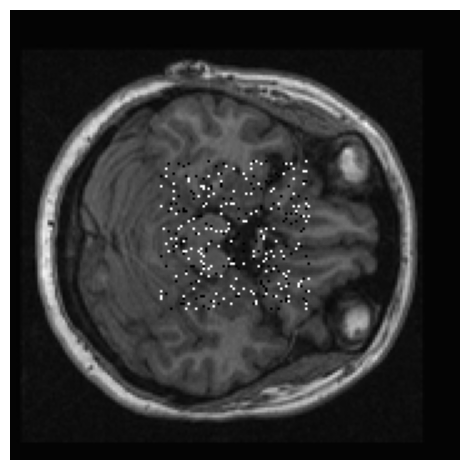

In [5]:
image = Image.open('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/mri_reshaped.png')
image_array = np.array(image)

block_dimensions = (60, 60)
middle_row = (image_array.shape[0] - block_dimensions[0]) // 2
middle_col = (image_array.shape[1] - block_dimensions[1]) // 2
block_location = (middle_row, middle_col)

noisy_image_array = add_salt_and_pepper_noise(image_array, block_location, block_dimensions)

noisy_image = Image.fromarray(noisy_image_array)
noisy_image.save('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/noisy_mri_middle.png')
plt.figure()
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

The characteristic of salt and pepper noise is that it randomly changes some pixels to either the maximum intensity value (salt) or the minimum intensity value (pepper). In other words, it creates random white and black dots (or "salt" and "pepper") in the image.


#### part 4

In [6]:
#%% 1.4
def calculate_block_variance(image, block_location, block_dimensions):
    """
    Calculate the variance in a block of an image.

    Parameters:
        image (numpy.ndarray): The input image array.
        block_location (tuple): Location of the block (top-left corner coordinates) - (row, column).
        block_dimensions (tuple): Dimensions of the block (height, width).

    Returns:
        float: Variance of the pixel values in the specified block.
    """
    block_row, block_col = block_location
    block_h, block_w = block_dimensions
    block = image[block_row:block_row+block_h, block_col:block_col+block_w]

    variance = np.var(block)

    return variance

In [7]:
image = Image.open('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/mri_reshaped.png')
image_array = np.array(image)

block_location = (100, 100)
block_dimensions = (60, 60)

variance = calculate_block_variance(image_array, block_location, block_dimensions)
print("Variance in the block:", variance)

Variance in the block: 1890.615518441358


#### part 5

In [8]:
#%% 1.5
def divide_image_into_parts(image, num_parts):
    """
    Divide the image into equal parts.

    Parameters:
        image (numpy.ndarray): The input image array.
        num_parts (int): Number of parts to divide the image into along each dimension.

    Returns:
        list of tuples: List of tuples containing the top-left corner coordinates
                        of each part and its corresponding dimensions.
    """
    h, w = image.shape[:2]
    part_height = h // num_parts
    part_width = w // num_parts
    parts = []
    for i in range(num_parts):
        for j in range(num_parts):
            part_location = (i * part_height, j * part_width)
            part_dimensions = (part_height, part_width)
            parts.append((part_location, part_dimensions))
    return parts

def plot_image_with_divided_parts(image, num_parts):
    """
    Plot the image with each side divided into equal parts and annotate each part with its number.

    Parameters:
        image (numpy.ndarray): The input image array.
        num_parts (int): Number of parts to divide the image into along each dimension.

    Returns:
        None
    """
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')

    h, w = image.shape[:2]
    part_height = h // num_parts
    part_width = w // num_parts

    for i in range(1, num_parts):
        ax.axhline(i * part_height, color='red', linestyle='--')
        ax.axvline(i * part_width, color='red', linestyle='--')

    for i, (part_location, _) in enumerate(divide_image_into_parts(image, num_parts)):
        row, col = part_location
        part_number = i + 1
        ax.text(col + 5, row + 15, str(part_number), color='red', fontsize=12)

    plt.axis('off')    
    plt.tight_layout()    
    plt.show()

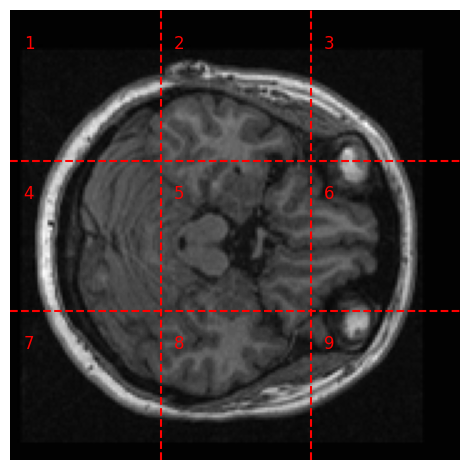

Largest variance: 2217.9910444444445
Part with the largest variance (top-left corner coordinates, dimensions): ((60, 0), (60, 60))


In [9]:
image = Image.open('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/mri_reshaped.png')
image_array = np.array(image)
num_parts = 3

plot_image_with_divided_parts(image_array, num_parts=num_parts)

image_parts = divide_image_into_parts(image_array, num_parts)

max_variance = 0
max_variance_part = None
for part_location, part_dimensions in image_parts:
    variance = calculate_block_variance(image_array, part_location, part_dimensions)
    if variance > max_variance:
        max_variance = variance
        max_variance_part = (part_location, part_dimensions)

print("Largest variance:", max_variance)
print("Part with the largest variance (top-left corner coordinates, dimensions):", max_variance_part)

In [10]:
def plot_image_with_divided_parts_and_variances(image, num_parts):
    """
    Plot the image with each side divided into equal parts, annotate each part with its number,
    and display the variance of each part.

    Parameters:
        image (numpy.ndarray): The input image array.
        num_parts (int): Number of parts to divide the image into along each dimension.

    Returns:
        None
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')

    h, w = image.shape[:2]
    part_height = h // num_parts
    part_width = w // num_parts

    for i in range(1, num_parts):
        plt.axhline(i * part_height, color='red', linestyle='--')
        plt.axvline(i * part_width, color='red', linestyle='--')

    for i, (part_location, part_dimensions) in enumerate(divide_image_into_parts(image, num_parts)):
        row, col = part_location
        part_number = i + 1
        plt.text(col + 5, row + 15, f"Part {part_number}", color='red', fontsize=12)

        variance = calculate_block_variance(image, part_location, part_dimensions)
        plt.text(col + 5, row + part_dimensions[0] - 15, f"Variance: {variance:.2f}", color='blue', fontsize=12)

    plt.axis('off')    
    plt.tight_layout()    
    plt.show()

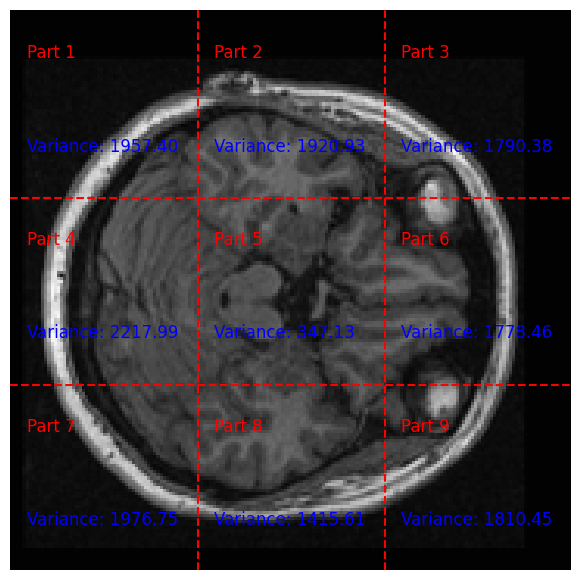

In [11]:
image = Image.open('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/mri_reshaped.png')
image_array = np.array(image)
plot_image_with_divided_parts_and_variances(image_array, num_parts=3)

#### part 6

In [12]:
#%% 1.6
def apply_median_filter(image, block_dimensions):
    return median_filter(image, size=block_dimensions)

def apply_gaussian_filter(image, block_dimensions):
    return gaussian_filter(image, sigma=1)

def apply_uniform_filter(image, block_dimensions):
    return uniform_filter(image, size=block_dimensions)

def choose_best_filter(image_array, noisy_image_array, block_location, block_dimensions):
    filters = {
        'Median Filter': apply_median_filter,
        'Gaussian Filter': apply_gaussian_filter,
        'Uniform Filter': apply_uniform_filter
    }
        
    block_row, block_col = block_location
    block_h, block_w = block_dimensions
    original_block = image_array[block_row:block_row+block_h, block_col:block_col+block_w].copy()
    noisy_block = noisy_image_array[block_row:block_row+block_h, block_col:block_col+block_w].copy()
    
    filtered_blocks = {}
    for filter_name, filter_func in filters.items():
        filtered_block = filter_func(noisy_block, (3,3))
        filtered_blocks[filter_name] = filtered_block

    fig, axes = plt.subplots(1, len(filtered_blocks) + 2, figsize=(15, 5))
    axes[0].imshow(original_block, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(noisy_block, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title('Noisy')
    axes[1].axis('off')
    
    for i, (filter_name, filtered_block) in enumerate(filtered_blocks.items(), start=1):
        axes[i+1].imshow(filtered_block, cmap='gray', vmin=0, vmax=255)
        axes[i+1].set_title(filter_name)
        axes[i+1].axis('off')
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, len(filtered_blocks) + 2, figsize=(15, 5))
    axes[0].imshow(image_array, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(noisy_image_array, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title('Noisy')
    axes[1].axis('off')
    
    for i, (filter_name, filtered_block) in enumerate(filtered_blocks.items(), start=1):
        noisy_image_array[block_row:block_row+block_h, block_col:block_col+block_w] = filtered_block
        axes[i+1].imshow(noisy_image_array, cmap='gray', vmin=0, vmax=255)
        axes[i+1].set_title(filter_name)
        axes[i+1].axis('off')    
    plt.tight_layout()    
    plt.show()
    
    return filtered_blocks

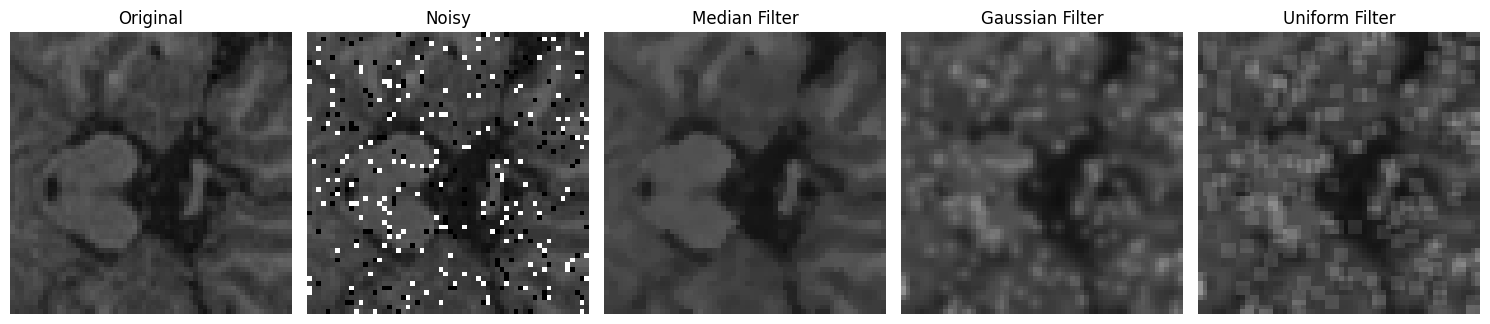

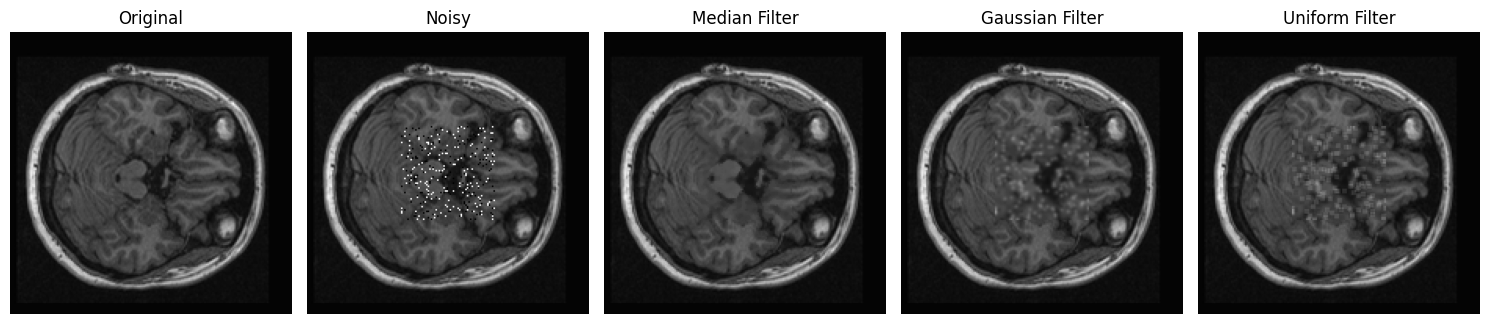

In [13]:
image = Image.open('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/mri_reshaped.png')
image_array = np.array(image)

noisy_image = Image.open('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/1/noisy_mri_middle.png')
noisy_image_array = np.array(noisy_image)

h, w = image_array.shape
block_dimensions = (60, 60)
middle_row = (image_array.shape[0] - block_dimensions[0]) // 2
middle_col = (image_array.shape[1] - block_dimensions[1]) // 2
block_location = (middle_row, middle_col)

filtered_blocks = choose_best_filter(image_array, noisy_image_array, block_location, block_dimensions)

#### part 7

In [14]:
#%% 1.7
def calculate_metrics(original_image, denoised_image):
    ssim_value = ssim(original_image, denoised_image)
    mae_value = np.median(np.abs(original_image - denoised_image))
    return ssim_value, mae_value

In [15]:
block_row, block_col = block_location
block_h, block_w = block_dimensions
original_block = image_array[block_row:block_row+block_h, block_col:block_col+block_w].copy()

In [16]:
ssim_values = {}
mae_values = {}
for filter_name, filtered_block in filtered_blocks.items():
    ssim_value, mae_value = calculate_metrics(original_block, filtered_block)
    ssim_values[filter_name] = ssim_value
    mae_values[filter_name] = mae_value

print("SSIM values:")
for filter_name, ssim_value in ssim_values.items():
    print(f"{filter_name}: {ssim_value}")

print("\nMAE values:")
for filter_name, mae_value in mae_values.items():
    print(f"{filter_name}: {mae_value}")

SSIM values:
Median Filter: 0.9089068403689244
Gaussian Filter: 0.5795776582893223
Uniform Filter: 0.5308987270635468

MAE values:
Median Filter: 5.0
Gaussian Filter: 228.0
Uniform Filter: 218.0


Based on the provided output:

- **SSIM values**:
  - Median Filter: 0.9089
  - Gaussian Filter: 0.5795
  - Uniform Filter: 0.5308

  Higher SSIM values indicate better structural similarity between the original and denoised images. In this case, the Median Filter achieved the highest SSIM value, suggesting that it preserves the structural information of the original image better compared to the other filters.

- **MAE values**:
  - Median Filter: 5.0
  - Gaussian Filter: 228.0
  - Uniform Filter: 218.0

  Lower MAE values indicate better denoising quality. The Median Filter achieved the lowest MAE value, indicating that it introduces the least amount of error in denoising compared to the other filters.

Based on these results, the Median Filter appears to be the most effective in terms of both SSIM and MAE values, indicating better denoising performance compared to the Gaussian and Uniform Filters.


---

### Question 2

In [17]:
#%% part 2
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
image = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/2/retina.png', cv2.IMREAD_GRAYSCALE)

In [19]:
def law_power_transform(image, gamma):
    transformed_image = np.power(image / 255.0, gamma)
    transformed_image = np.uint8(255 * transformed_image)
    return transformed_image

def logarithmic_transform(image):
    transformed_image = (np.log1p(image) / np.log1p(255)) * 255
    transformed_image = np.uint8(transformed_image)
    return transformed_image

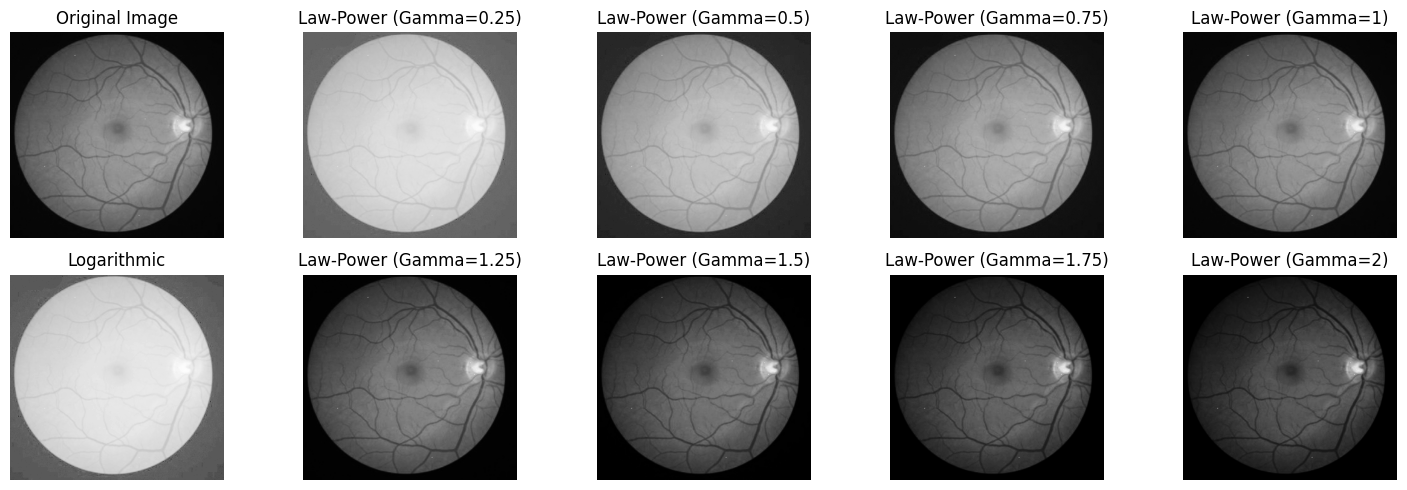

In [20]:
gamma_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

plt.figure(figsize=(15, 5))

plt.subplot(2, (len(gamma_values) + 2)//2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

logarithmic_result = logarithmic_transform(image)
plt.subplot(2, (len(gamma_values) + 2)//2, 6)
plt.imshow(logarithmic_result, cmap='gray')
plt.title('Logarithmic')
plt.axis('off')

for i, gamma in enumerate(gamma_values):
    law_power_result = law_power_transform(image, gamma)
    if i<4:
        plt.subplot(2, (len(gamma_values) + 2)//2, i + 2)
    else:
        plt.subplot(2, (len(gamma_values) + 2)//2, i + 3)
    plt.imshow(law_power_result, cmap='gray')
    plt.title('Law-Power (Gamma={})'.format(gamma))
    plt.axis('off')

plt.tight_layout()
plt.show()

---

### Question 3

In [21]:
#%% part 3
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [22]:
image = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/3/hand_xray.jpg', cv2.IMREAD_GRAYSCALE)

In [23]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

rotated_fshift = np.rot90(fshift, 2)

rotated_f = np.fft.ifftshift(rotated_fshift)

rotated_image = np.fft.ifft2(rotated_f)
rotated_image = np.abs(rotated_image)
rotated_image = np.uint8(rotated_image)

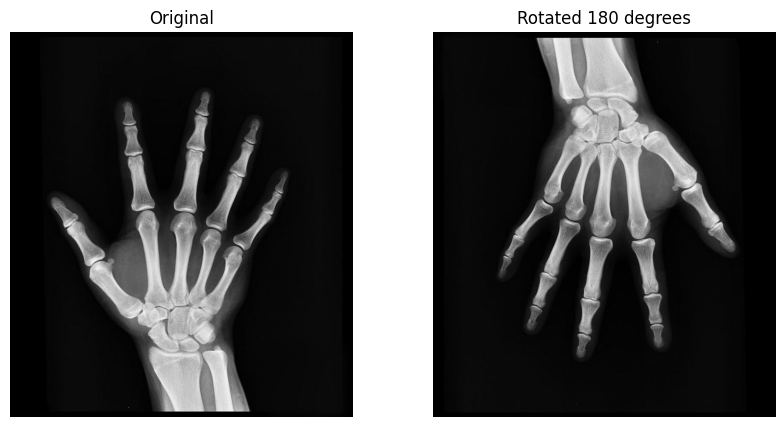

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotated 180 degrees')
plt.axis('off')
plt.show()

Image.fromarray(rotated_image.astype(np.uint8)).save('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/3/rotated_image.png')

---

### Question 4


In [25]:
#%% part 4
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [26]:
monkey_img = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/4/monkey.jpg', cv2.IMREAD_GRAYSCALE)
lion_img = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/4/lion.jpg', cv2.IMREAD_GRAYSCALE)

In [27]:
monkey_fft = np.fft.fft2(monkey_img)
lion_fft = np.fft.fft2(lion_img)

monkey_magnitude = np.abs(monkey_fft)
lion_magnitude = np.abs(lion_fft)
monkey_phase = np.angle(monkey_fft)
lion_phase = np.angle(lion_fft)

monkey_new_fft = monkey_magnitude * np.exp(1j * lion_phase)
lion_new_fft = lion_magnitude * np.exp(1j * monkey_phase)

monkey_new_img = np.fft.ifft2(monkey_new_fft).real
lion_new_img = np.fft.ifft2(lion_new_fft).real

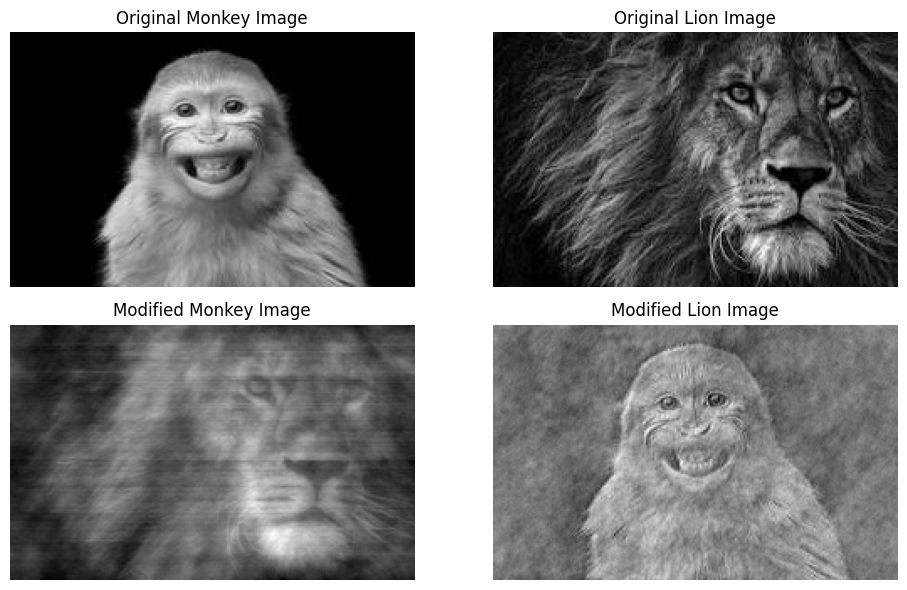

In [28]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(monkey_img, cmap='gray')
plt.title('Original Monkey Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(lion_img, cmap='gray')
plt.title('Original Lion Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(monkey_new_img, cmap='gray')
plt.title('Modified Monkey Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(lion_new_img, cmap='gray')
plt.title('Modified Lion Image')
plt.axis('off')

plt.tight_layout()
plt.savefig('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/4/final_figure.png', dpi=300)
plt.show()

From the obtained output, we'll observe that the modified images will retain the general structure of the original image (monkey or lion) but with characteristics borrowed from the other image due to the phase swapping. This demonstrates the importance of the phase information in the Fourier domain for image reconstruction.


---

### Question 5

In [29]:
#%% part 5
import cv2
import numpy as np
from skimage import color
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import wiener

In [30]:
def apply_degradation(image, kernel_size=5, noise_mean=0, noise_std=1):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    degraded_image = cv2.filter2D(image, -1, kernel)
    
    noise = np.random.normal(noise_mean, noise_std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    
    degraded_noisy_image = cv2.add(degraded_image, noise)
    
    return degraded_image, noisy_image, degraded_noisy_image

def wiener_filter(image, kernel, noise_var):
    F = np.fft.fft2(image)
    H = np.fft.fft2(kernel, s=image.shape)

    S = np.abs(H)**2
    N = noise_var

    G = np.conj(H) / (S + N)

    F_filtered = G * F

    image_filtered = np.fft.ifft2(F_filtered).real

    return image_filtered

def calculate_psnr(image1, image2):
    return peak_signal_noise_ratio(image1, image2)

In [31]:
image = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/5/retina.png', cv2.IMREAD_GRAYSCALE)
noise_std = 1
degraded_image, noisy_image, degraded_noisy_image = apply_degradation(image, noise_std=noise_std)

wiener_filtered_degraded = wiener_filter(degraded_image, np.ones((5, 5)), noise_var=noise_std**2)
wiener_filtered_noisy = wiener(noisy_image, (5, 5), noise=noise_std**2)
wiener_filtered_degraded_noisy = wiener(degraded_noisy_image, (5, 5), noise=noise_std**2)

psnr_degraded = calculate_psnr(image, degraded_image)
psnr_noisy = calculate_psnr(image, noisy_image)
psnr_degraded_noisy = calculate_psnr(image, degraded_noisy_image)

psnr_filtered_degraded = calculate_psnr(image, wiener_filtered_degraded)
psnr_filtered_noisy = calculate_psnr(image, wiener_filtered_noisy)
psnr_filtered_degraded_noisy = calculate_psnr(image, wiener_filtered_degraded_noisy)

print("PSNR for degraded image:", psnr_degraded)
print("PSNR for noisy image:", psnr_noisy)
print("PSNR for degraded noisy image:", psnr_degraded_noisy)

print("PSNR for Wiener filtered (degraded) image:", psnr_filtered_degraded)
print("PSNR for Wiener filtered (noisy) image:", psnr_filtered_noisy)
print("PSNR for Wiener filtered (degraded, noisy) image:", psnr_filtered_degraded_noisy)

PSNR for degraded image: 35.82807220288991
PSNR for noisy image: 11.048299271989503
PSNR for degraded noisy image: 11.036505508006908
PSNR for Wiener filtered (degraded) image: 8.51674146644153
PSNR for Wiener filtered (noisy) image: 18.19444293249112
PSNR for Wiener filtered (degraded, noisy) image: 18.145958181050307


C:\Users\aryak\AppData\Local\Temp\ipykernel_19536\3866775664.py:28: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  return peak_signal_noise_ratio(image1, image2)


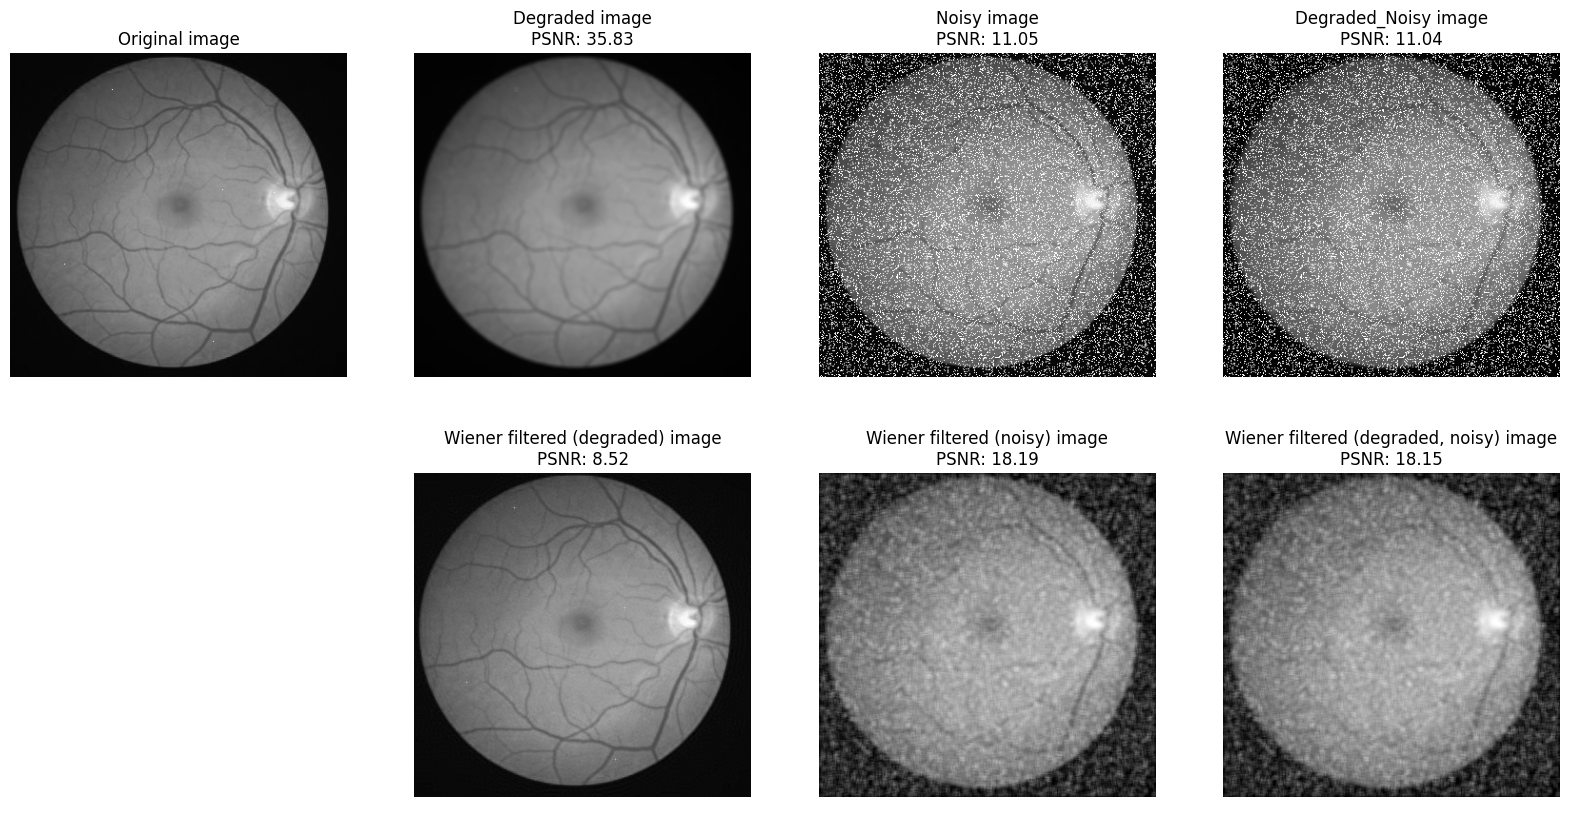

In [32]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original image')

axs[0, 1].imshow(degraded_image, cmap='gray')
axs[0, 1].set_title('Degraded image\nPSNR: {:.2f}'.format(psnr_degraded))

axs[0, 2].imshow(noisy_image, cmap='gray')
axs[0, 2].set_title('Noisy image\nPSNR: {:.2f}'.format(psnr_noisy))

axs[0, 3].imshow(degraded_noisy_image, cmap='gray')
axs[0, 3].set_title('Degraded_Noisy image\nPSNR: {:.2f}'.format(psnr_degraded_noisy))

axs[1, 1].imshow(wiener_filtered_degraded, cmap='gray')
axs[1, 1].set_title('Wiener filtered (degraded) image\nPSNR: {:.2f}'.format(psnr_filtered_degraded))

axs[1, 2].imshow(wiener_filtered_noisy, cmap='gray')
axs[1, 2].set_title('Wiener filtered (noisy) image\nPSNR: {:.2f}'.format(psnr_filtered_noisy))

axs[1, 3].imshow(wiener_filtered_degraded_noisy, cmap='gray')
axs[1, 3].set_title('Wiener filtered (degraded, noisy) image\nPSNR: {:.2f}'.format(psnr_filtered_degraded_noisy))

for ax in axs.flat:
    ax.axis('off')

plt.show()

PSNR (Peak Signal-to-Noise Ratio) is a metric used to measure the quality of a reconstructed or processed image compared to its original version. It is expressed in decibels (dB) and is calculated as:

$$ \text{PSNR} = 10 \times \log_{10} \left( \frac{{\text{MAX}^2}}{{\text{MSE}}} \right) $$

where MAX is the maximum possible pixel value of the image (for example, 255 for an 8-bit image) and MSE (Mean Squared Error) is the average squared difference between the pixels of the original and processed images. PSNR provides a quantitative measure of how much noise or distortion is present in the processed image compared to the original, with higher values indicating better quality.


---

### Question 6
#### part 1

In [50]:
#%% part 6
#%% 6.1
import cv2
import numpy as np
import matplotlib.pyplot as plt

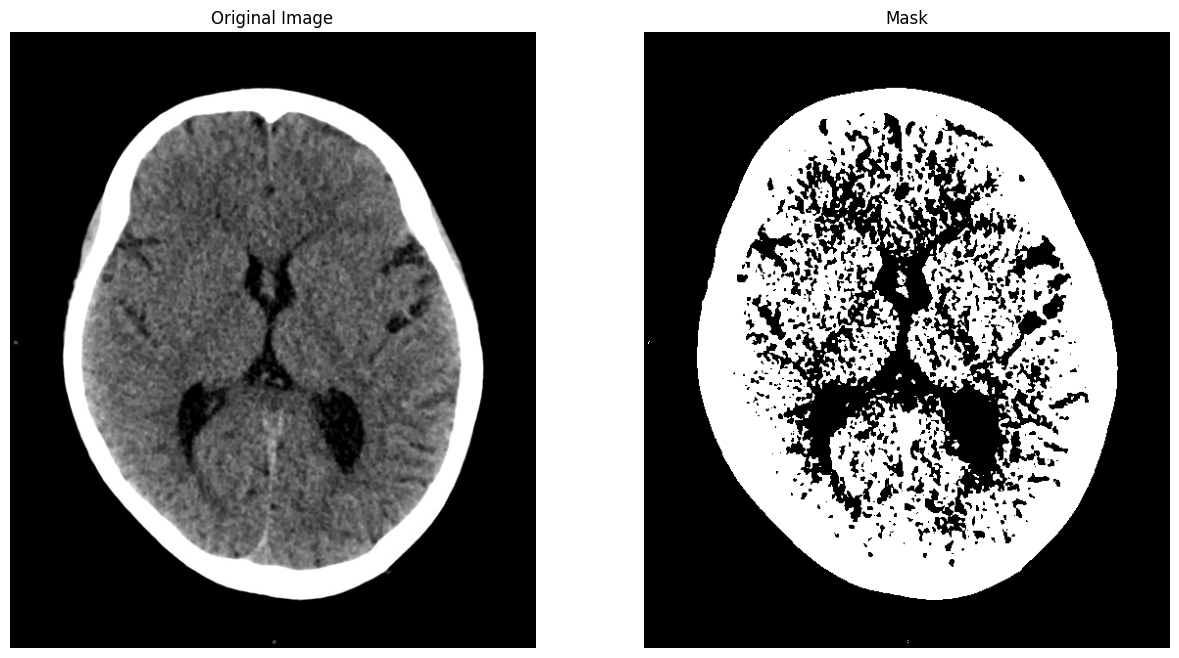

In [52]:
image = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/6/brain_ct.jpeg', cv2.IMREAD_GRAYSCALE)

threshold_value = 82
mask = np.where(image > threshold_value, 1, 0).astype(np.uint8)

cv2.imwrite('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/6/brain_ct_mask.jpeg', mask * 255)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(mask*255, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')
plt.show()

#### part 2

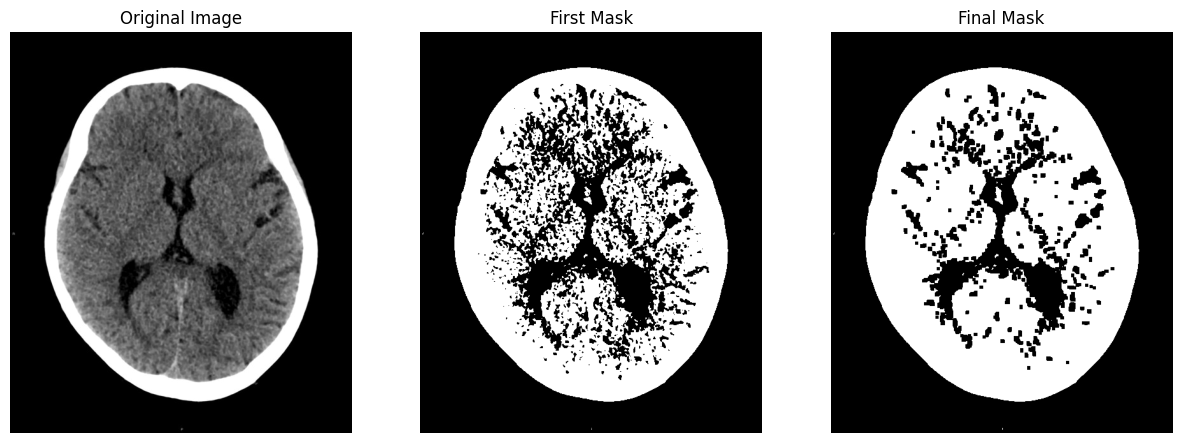

In [53]:
#%% 6.2
kernel = np.ones((5, 5), np.uint8)
closed_mask = cv2.morphologyEx(mask*255, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[2].imshow(closed_mask, cmap='gray')
axes[2].set_title('Final Mask')
axes[2].axis('off')

axes[1].imshow(mask*255, cmap='gray')
axes[1].set_title('First Mask')
axes[1].axis('off')

plt.show()

#### part 3

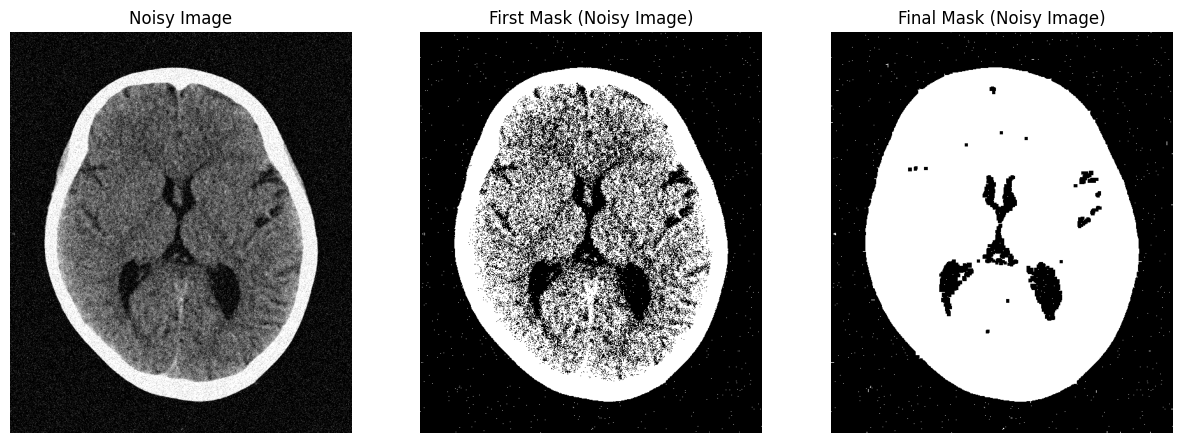

In [54]:
#%% 6.3
mean = 0
variance = 900
sigma = np.sqrt(variance)
gaussian_noise = np.random.normal(mean, sigma, image.shape)

noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

noisy_mask = np.where(noisy_image > threshold_value, 1, 0).astype(np.uint8)

kernel = np.ones((5, 5), np.uint8)
closed_noisy_mask = cv2.morphologyEx(noisy_mask*255, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')

axes[2].imshow(closed_noisy_mask, cmap='gray')
axes[2].set_title('Final Mask (Noisy Image)')
axes[2].axis('off')

axes[1].imshow(noisy_mask*255, cmap='gray')
axes[1].set_title('First Mask (Noisy Image)')
axes[1].axis('off')

plt.show()

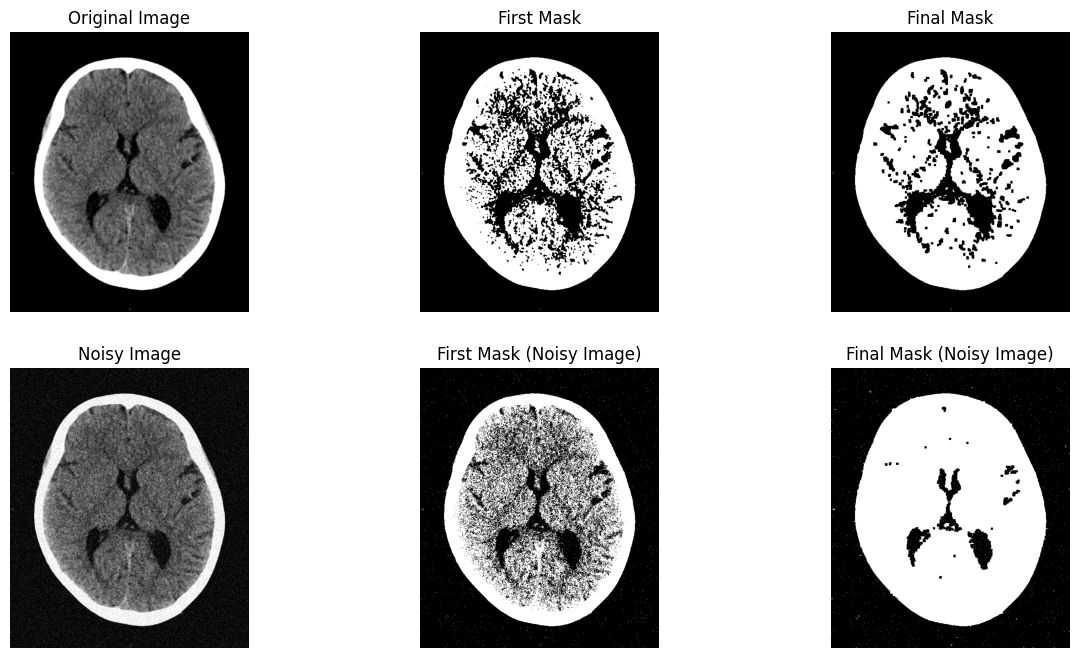

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 2].imshow(closed_mask, cmap='gray')
axes[0, 2].set_title('Final Mask')
axes[0, 2].axis('off')

axes[0, 1].imshow(mask*255, cmap='gray')
axes[0, 1].set_title('First Mask')
axes[0, 1].axis('off')


axes[1, 0].imshow(noisy_image, cmap='gray')
axes[1, 0].set_title('Noisy Image')
axes[1, 0].axis('off')

axes[1, 2].imshow(closed_noisy_mask, cmap='gray')
axes[1, 2].set_title('Final Mask (Noisy Image)')
axes[1, 2].axis('off')

axes[1, 1].imshow(noisy_mask*255, cmap='gray')
axes[1, 1].set_title('First Mask (Noisy Image)')
axes[1, 1].axis('off')

plt.show()

---

### Question 7
#### part 1

In [57]:
#%% part 7
#%% 7.1
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [58]:
image = io.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/7/pca_xray.jpg')

image_bw = color.rgb2gray(image)

n_samples = image_bw.shape[0]
data = image_bw.reshape(n_samples, -1)

n_components = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

data_reconstructed = pca.inverse_transform(data_pca)
image_reconstructed = data_reconstructed.reshape(image_bw.shape)

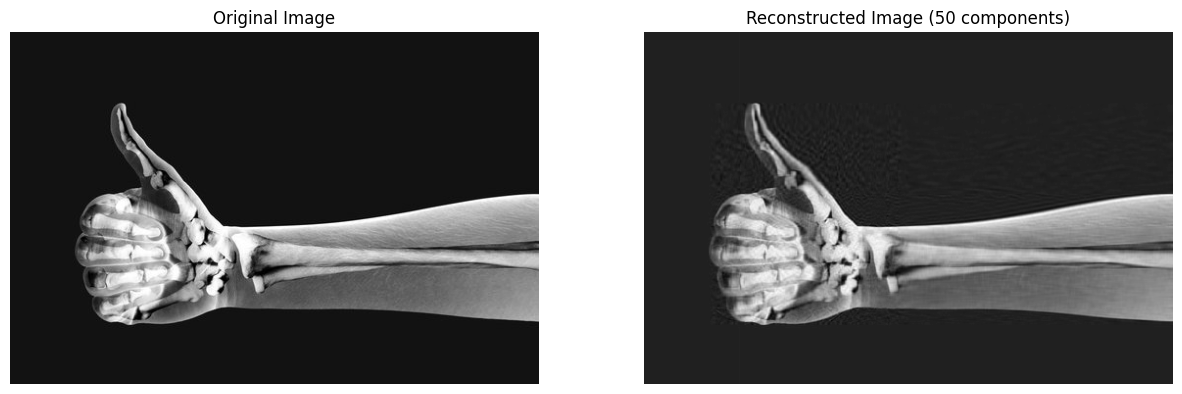

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(image_bw, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(image_reconstructed, cmap='gray')
ax[1].set_title('Reconstructed Image (50 components)')
ax[1].axis('off')
plt.show()

### part 2

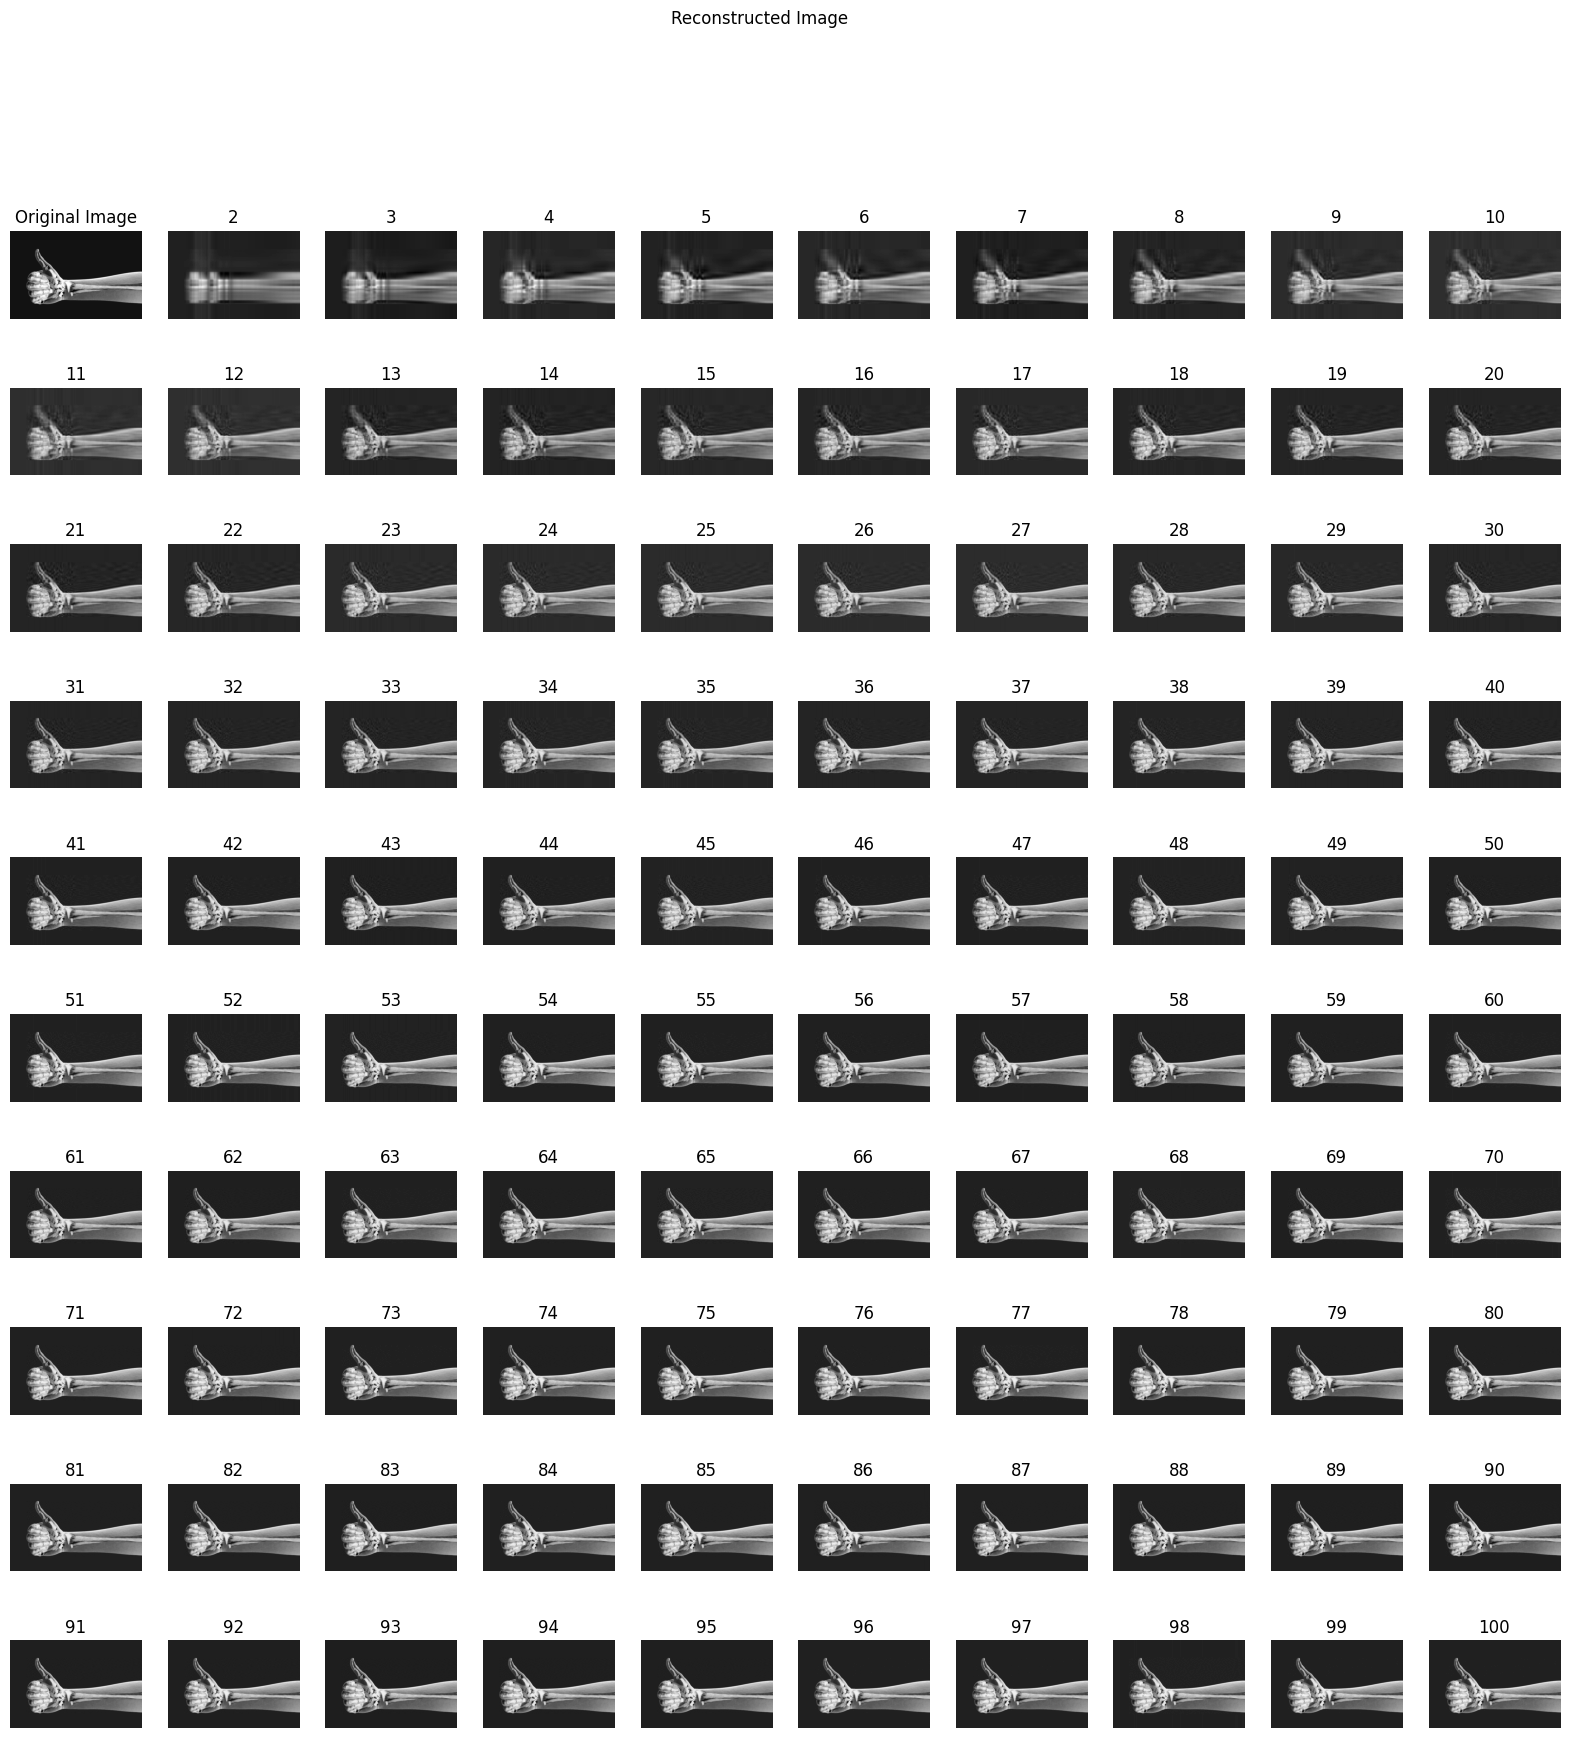

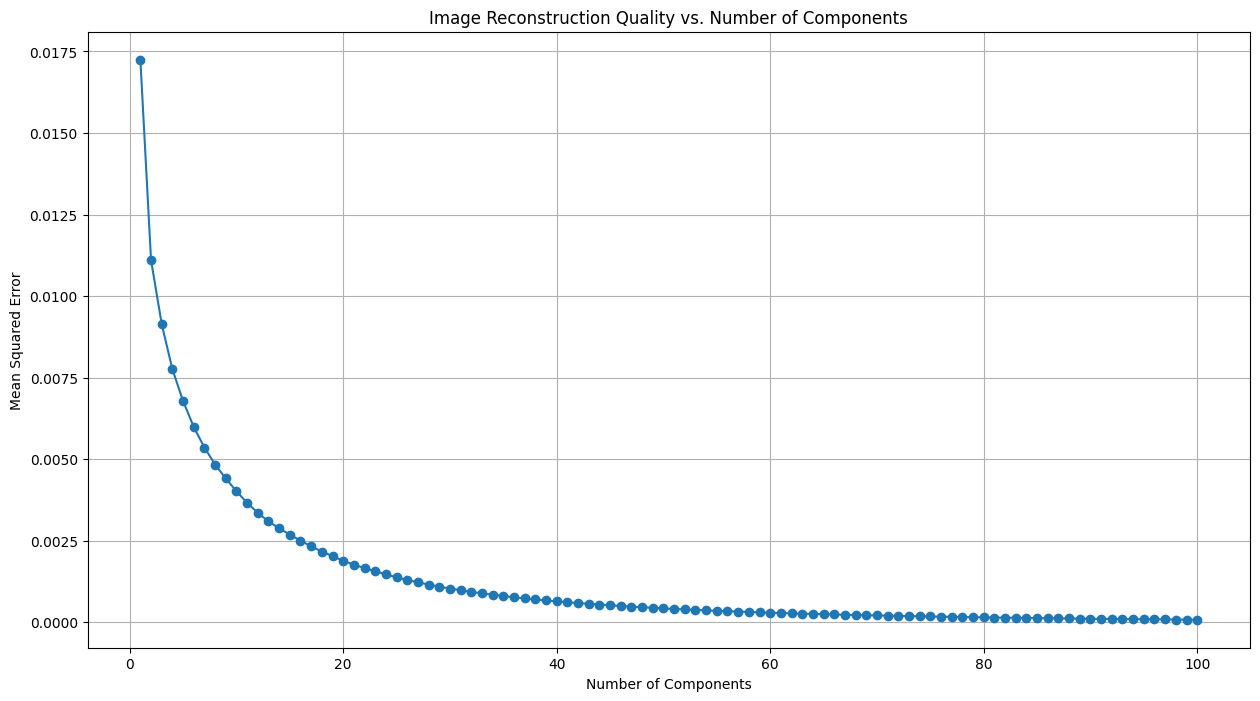

In [60]:
#%% 7.2
components_range = range(1, 101)

plt.figure(figsize=(20, 20))
plt.subplot(10, len(components_range)//10, 1)
plt.imshow(image_bw, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.suptitle('Reconstructed Image')

mse_values = []
for n_components in components_range:
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    data_reconstructed = pca.inverse_transform(data_pca)
    image_reconstructed = data_reconstructed.reshape(image_bw.shape)
    
    mse = mean_squared_error(image_bw, image_reconstructed)
    mse_values.append(mse)
    
    if n_components > 1 :
        plt.subplot(10, len(components_range)//10, n_components)
        plt.imshow(image_reconstructed, cmap='gray')
        plt.title(f'{n_components}')
        plt.axis('off')

plt.show()

plt.figure(figsize=(15, 8))
plt.plot(components_range, mse_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.title('Image Reconstruction Quality vs. Number of Components')
plt.grid(True)
plt.show()


---

### Question 8
#### part 1


#%% part 8
#%% 8.1
The hat-transforms, also known as "top-hat" and "bottom-hat" transforms, are morphological operations used to enhance certain features in an image, particularly those that are smaller or larger than a specified structuring element.

1. **Top-Hat Transform (White Top-Hat)**:
   - The top-hat transform enhances bright regions that are smaller than the structuring element and removes the background.
   - It is obtained by subtracting the input image from its opening, which effectively extracts small bright regions.
   - The equation for the white top-hat transform is:
     $$ T_{\text{top-hat}}(f) = f - (f \circ b) $$

2. **Bottom-Hat Transform (Black Top-Hat)**:
   - The bottom-hat transform enhances dark regions that are smaller than the structuring element and suppresses the background.
   - It is obtained by subtracting the closing of the input image from the input image, which effectively extracts small dark regions.
   - The equation for the black top-hat transform is:
     $$ T_{\text{bottom-hat}}(f) = (f \bullet b) - f $$

In these equations, $$ f $$ represents the input image, $$ b $$ is the structuring element, $$ \circ $$ denotes the opening operation, and $$ \bullet $$ denotes the closing operation.


#### part 2

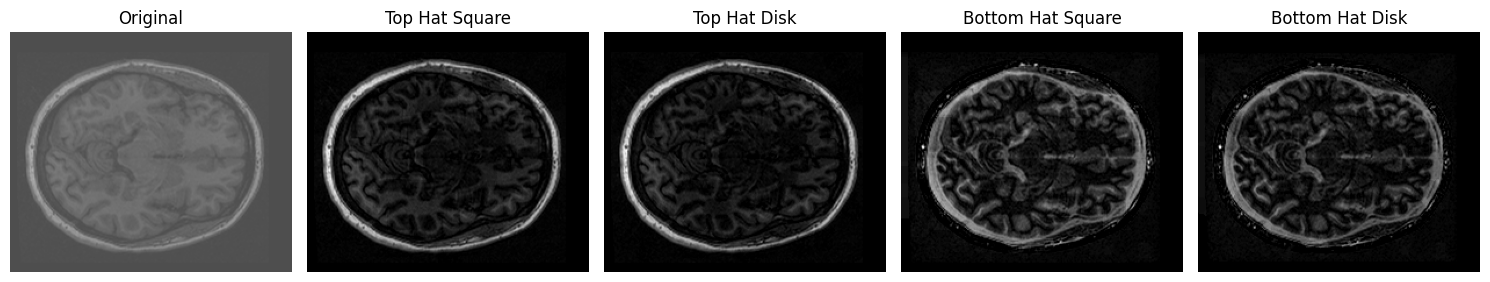

In [42]:
#%% 8.2
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_org = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/mri_low_contrast.png')
image = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY) 

square_mask = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
disk_mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

tophat_square = image - cv2.morphologyEx(image, cv2.MORPH_OPEN, square_mask)
tophat_square = (tophat_square/np.max(tophat_square)*255).astype(np.uint8)

tophat_disk = image - cv2.morphologyEx(image, cv2.MORPH_OPEN, disk_mask)
tophat_disk = (tophat_disk/np.max(tophat_disk)*255).astype(np.uint8)

bottomhat_square = cv2.morphologyEx(image, cv2.MORPH_CLOSE, square_mask) - image
bottomhat_square = (bottomhat_square/np.max(bottomhat_square)*255).astype(np.uint8)

bottomhat_disk = cv2.morphologyEx(image, cv2.MORPH_CLOSE, disk_mask) - image
bottomhat_disk = (bottomhat_disk/np.max(bottomhat_disk)*255).astype(np.uint8)

cv2.imwrite('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/tophat_square.jpg', tophat_square)
cv2.imwrite('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/tophat_disk.jpg', tophat_disk)
cv2.imwrite('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/bottomhat_square.jpg', bottomhat_square)
cv2.imwrite('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/bottomhat_disk.jpg', bottomhat_disk)

cv2.imshow("Original", image_org)
cv2.imshow("Top Hat Square", tophat_square)
cv2.imshow("Top Hat Disk", tophat_disk)
cv2.imshow("Bottom Hat Square", bottomhat_square)
cv2.imshow("Bottom Hat Disk", bottomhat_disk)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(15, 30))
plt.subplot(1, 5, 1)
plt.imshow(image_org, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(tophat_square, cmap='gray')
plt.title("Top Hat Square")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(tophat_disk, cmap='gray')
plt.title("Top Hat Disk")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(bottomhat_square, cmap='gray')
plt.title("Bottom Hat Square")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(bottomhat_disk, cmap='gray')
plt.title("Bottom Hat Disk")
plt.axis('off')
plt.tight_layout()
plt.show()

#### part 3

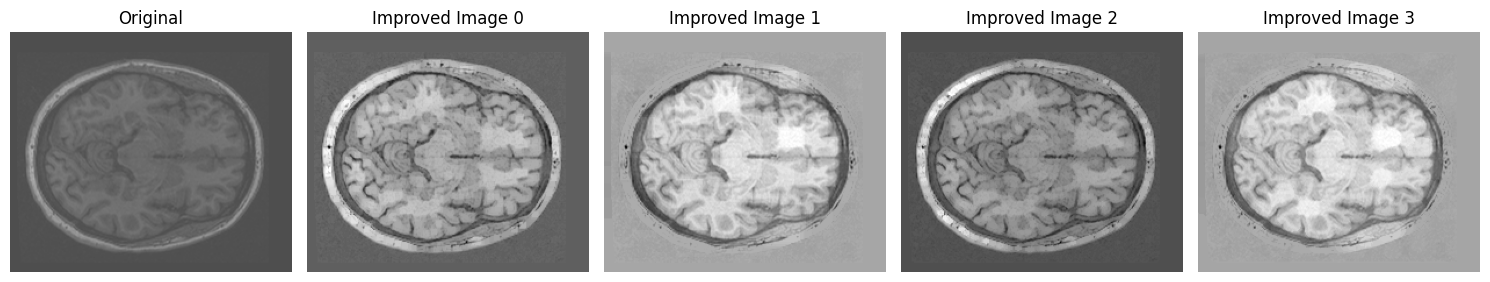

In [43]:
#%% 8.3
image_org = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/mri_low_contrast.png')

masks = [
    cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
    cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15)),
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)),
]

improved_images = []

for mask in masks:
    opening_result = cv2.morphologyEx(image, cv2.MORPH_OPEN, mask)
    closing_result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, mask)

    improved_image = image + opening_result - closing_result

    improved_images.append(improved_image)

plt.figure(figsize=(15, 30))
plt.subplot(1, 5, 1)
plt.imshow(image_org)
plt.title('Original')
plt.axis('off')

for i, improved_image in enumerate(improved_images):
    cv2.imwrite(f'C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/improved_image_{i}.jpg', improved_image)
    cv2.imshow(f'Improved Image {i}', improved_image)
    plt.subplot(1, 5, i+2)
    plt.imshow(improved_image, cmap='gray')
    plt.title(f'Improved Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Scored question

*) In medical image processing, especially in applications like MRI (Magnetic Resonance Imaging) or CT (Computed Tomography), the choice of mask for morphological operations can significantly impact the quality of the results. One commonly used type of mask is the **disk-shaped structuring element**.

### Reason for Using Disk-Shaped Structuring Elements:

1. **Sensitivity to Local Structure**: Disk-shaped structuring elements are effective in capturing the local structure of features in medical images, such as blood vessels, lesions, or anatomical structures. The circular shape allows them to adapt well to the contours of these structures, providing better sensitivity compared to other shapes.

2. **Rotation Invariance**: Disk-shaped structuring elements are rotationally invariant, meaning they perform equally well regardless of their orientation. This property is crucial in medical imaging, where the orientation of structures can vary widely between patients or even within the same patient's scans.

3. **Smoothness and Connectivity**: The smooth, continuous nature of disk-shaped structuring elements helps preserve the connectivity of structures in the image while filtering out noise or small artifacts. This is particularly important for maintaining the integrity of anatomical structures in medical images.

4. **Spatial Localization**: Disk-shaped structuring elements offer precise spatial localization, allowing for selective enhancement or suppression of features based on their size and proximity to the structuring element. This enables targeted processing tailored to specific anatomical features or pathological conditions.

5. **Controlled Influence Radius**: The radius of a disk-shaped structuring element directly controls the size of the neighborhood considered during morphological operations. This provides a tunable parameter to adjust the level of detail captured or filtered in the image, offering flexibility in optimizing the trade-off between sensitivity and noise suppression.

Overall, the use of disk-shaped structuring elements in medical image processing strikes a balance between sensitivity to local structures, robustness to variations, preservation of connectivity, and control over spatial influence, making them well-suited for enhancing contrast, extracting features, and segmenting anatomical or pathological regions of interest in medical images.


#### part 4

In [45]:
#%% 8.4
def local_contrast(p_window, a_window):
    p_avg = np.mean(p_window)
    a_avg = np.mean(a_window)
    return np.abs(p_avg - a_avg) / np.abs(p_avg + a_avg)

def calculate_CIR(original_image, improved_image, region):
    original_contrasts = []
    improved_contrasts = []
    
    for x in range(region[0], region[2]):
        for y in range(region[1], region[3]):
            p_window = original_image[x-1:x+2, y-1:y+2]  # 3x3 window
            a_window = original_image[x-3:x+4, y-3:y+4]  # 7x7 window
            
            original_contrasts.append(local_contrast(p_window, a_window))
            
            improved_p_window = improved_image[x-1:x+2, y-1:y+2]  # 3x3 window
            improved_a_window = improved_image[x-3:x+4, y-3:y+4]  # 7x7 window
            
            improved_contrasts.append(local_contrast(improved_p_window, improved_a_window))
    
    original_contrasts = np.array(original_contrasts)
    improved_contrasts = np.array(improved_contrasts)
    
    CIR = np.sum((original_contrasts - improved_contrasts)**2) / np.sum(original_contrasts**2)
    
    return CIR

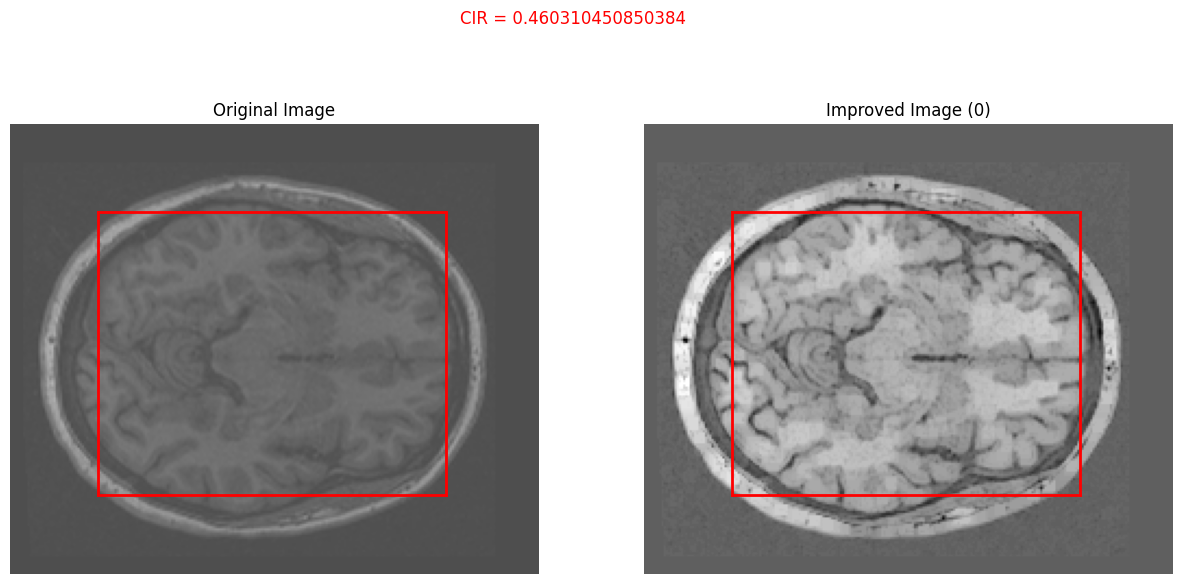

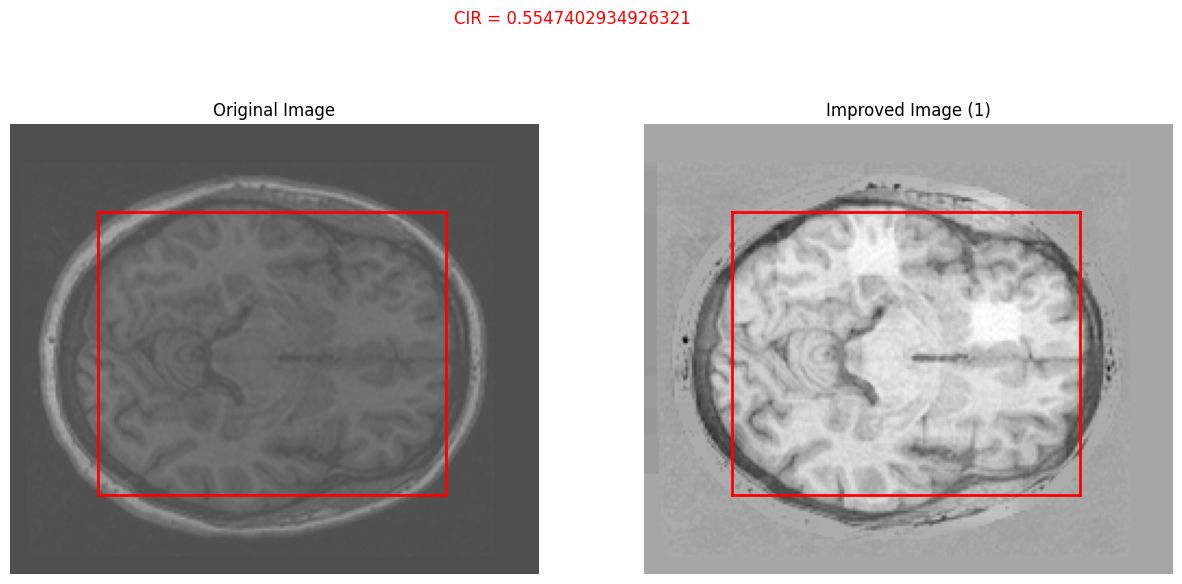

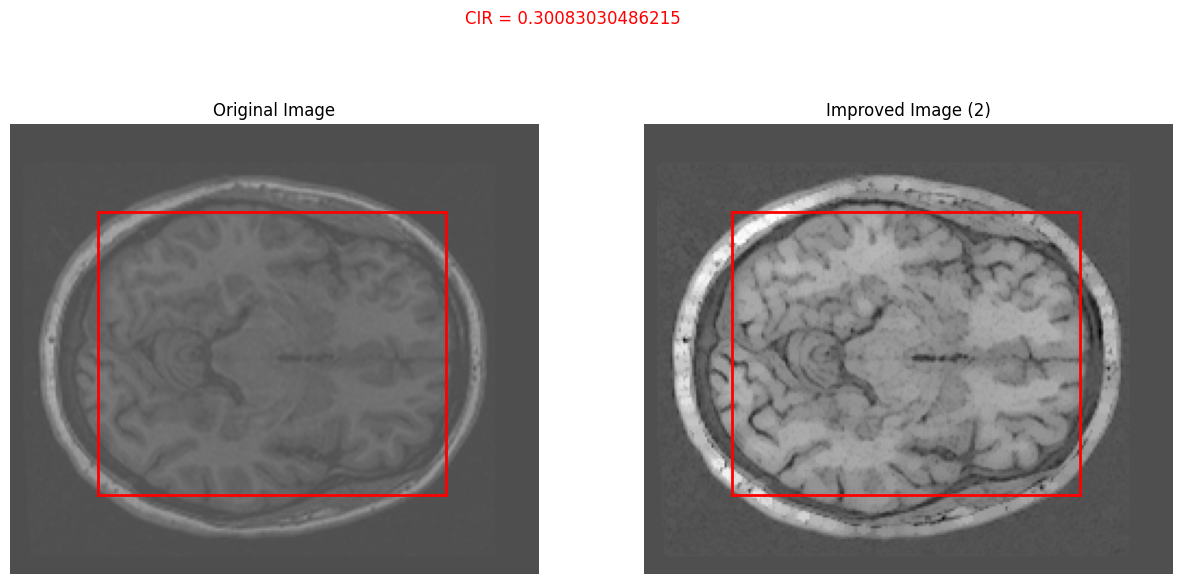

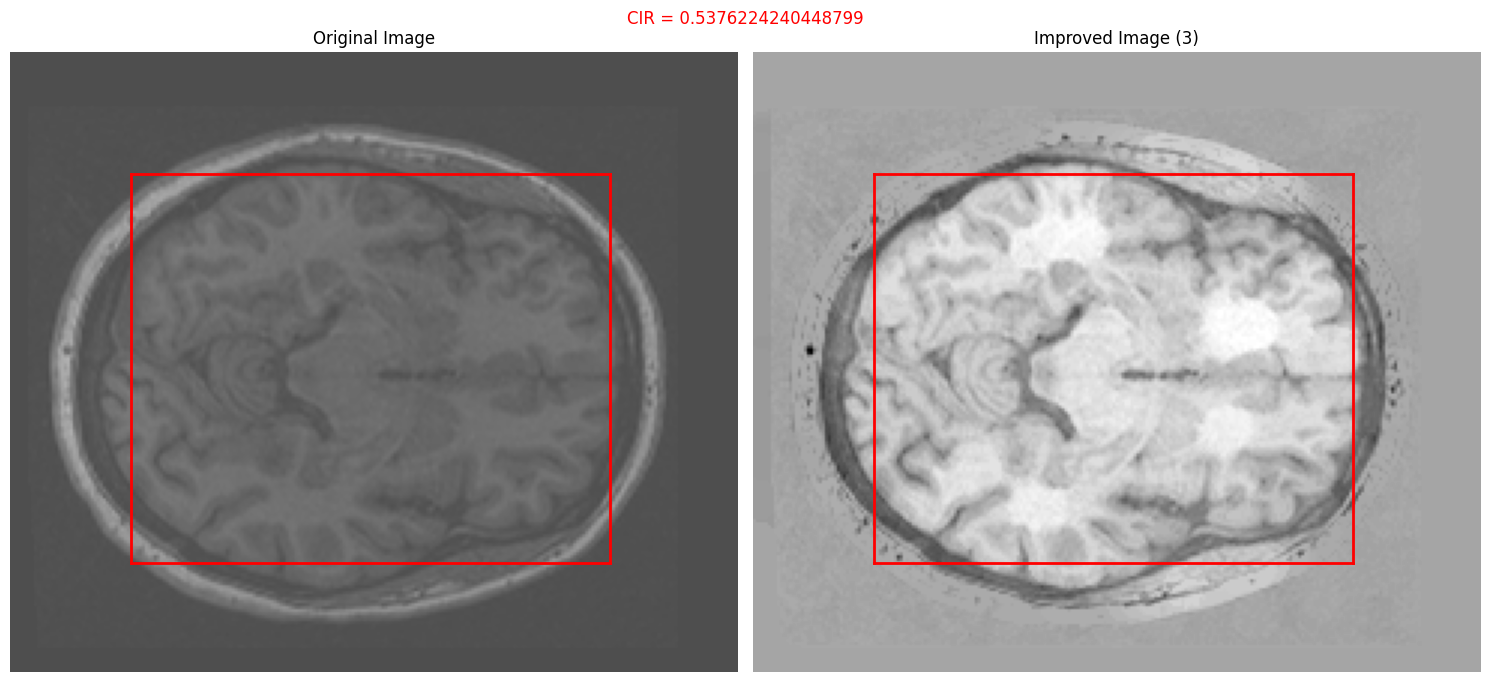

In [46]:
region = (40, 40, 200, 170) #(x_min, y_min, x_max, y_max)
x_min, y_min, x_max, y_max = region

CIRs = []
for i, improved_image in enumerate(improved_images):
    CIR = calculate_CIR(image_org, improved_image, region)
    
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(image_org)
    plt.title("Original Image")
    plt.plot([x_min, x_max], [y_min, y_min], color='red', linewidth=2)
    plt.plot([x_min, x_max], [y_max, y_max], color='red', linewidth=2)
    plt.plot([x_min, x_min], [y_min, y_max], color='red', linewidth=2)
    plt.plot([x_max, x_max], [y_min, y_max], color='red', linewidth=2)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(f"Improved Image ({i})")
    plt.imshow(improved_image, cmap='gray')
    plt.plot([x_min, x_max], [y_min, y_min], color='red', linewidth=2)
    plt.plot([x_min, x_max], [y_max, y_max], color='red', linewidth=2)
    plt.plot([x_min, x_min], [y_min, y_max], color='red', linewidth=2)
    plt.plot([x_max, x_max], [y_min, y_max], color='red', linewidth=2)
    plt.axis('off')
    
    plt.suptitle(f'CIR = {CIR}', color='red', fontsize=12)
    CIRs.append(CIR)
    
plt.tight_layout()
plt.show()

#### part 5

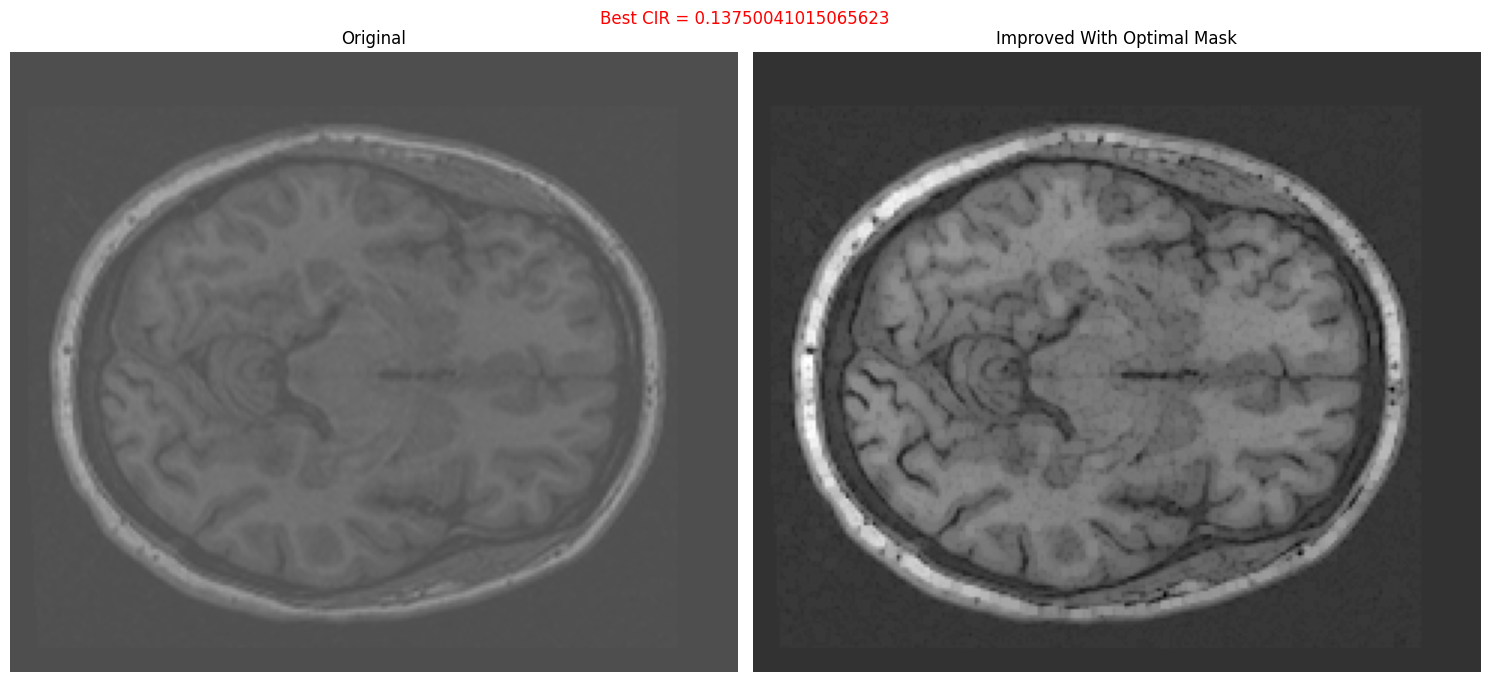

In [47]:
#%% part 8.5
image_org = cv2.imread('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/mri_low_contrast.png')
original_image = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)

region = (40, 40, 200, 170) #(x_min, y_min, x_max, y_max)

mask = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

best_mask = None
best_cir = 0

while True:
    mask = cv2.dilate(mask, None)
    opening_result = cv2.morphologyEx(original_image, cv2.MORPH_OPEN, mask)
    closing_result = cv2.morphologyEx(original_image, cv2.MORPH_CLOSE, mask)
    improved_image = original_image + opening_result - closing_result
    
    cir = calculate_CIR(original_image, improved_image, region)
    
    if cir > best_cir:
        best_cir = cir
        best_mask = mask.copy()
    else:
        break

best_opening_result = cv2.morphologyEx(original_image, cv2.MORPH_OPEN, best_mask)
best_closing_result = cv2.morphologyEx(original_image, cv2.MORPH_CLOSE, best_mask)
improved_image = original_image + best_opening_result - best_closing_result
cv2.imwrite('C:/Users/aryak/OneDrive/Desktop/MAM/HW01/8/improved_image_with_optimal_mask.jpg', improved_image)

plt.figure(figsize=(15, 7))
plt.suptitle(f'Best CIR = {best_cir}', color='red', fontsize=12)
plt.subplot(1, 2, 1)
plt.imshow(image_org, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(improved_image, cmap='gray')
plt.title("Improved With Optimal Mask")
plt.axis('off')
plt.tight_layout()
plt.show()s